In [1]:
!nvidia-smi

Mon May 29 17:36:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# verificar em qual diretório o script está sendo executado
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Ultralytics é usado para tarefas relacionadas a visão computacional, como detecção de objetos e análise de imagens.
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [4]:
# importa a classe YOLO do Ultralytics

from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
!ls /content

PeladaAmigos.jpeg


In [6]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/PeladaAmigos.jpeg' save=True

100% 6.23M/6.23M [00:00<00:00, 257MB/s]
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 /content/PeladaAmigos.jpeg: 480x640 16 persons, 2 sports balls, 60.2ms
Speed: 15.3ms preprocess, 60.2ms inference, 300.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


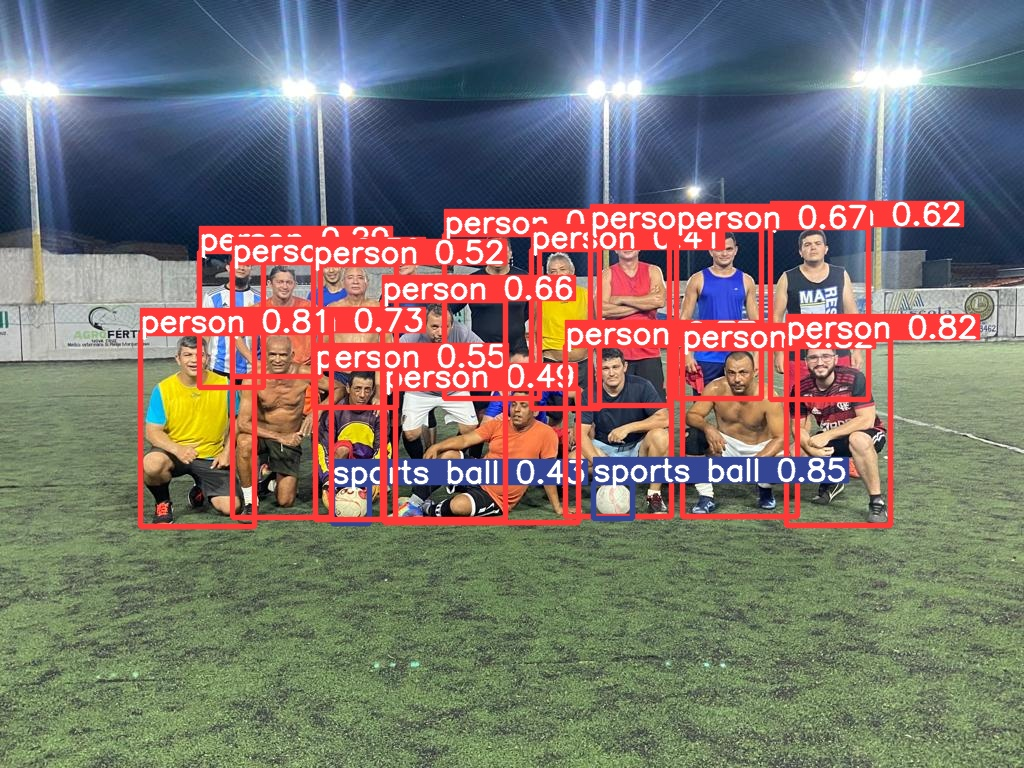

In [7]:
Image(filename='/content/runs/detect/predict/PeladaAmigos.jpeg', height=600)

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1XSyo44Ff6sz3vS6IsPe")
project = rf.workspace("ufrn-kiopm").project("fotball-players-detection")
dataset = project.version(1).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=d892eaf824908839228af5db59d9d0caa50865d723f788111875e3ab4da4765b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.110, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Fotball-Players-Detection--1 in yolov8:: 100%|██████████| 656/656 [00:00<00:00, 3225.57it/s]


In [9]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 22.6MB/s]
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Fotball-Players-Detection--1/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

In [10]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png
confusion_matrix_normalized.png			    results.csv
confusion_matrix.png				    results.png
events.out.tfevents.1685381947.643a7aff0c5f.1447.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights


/content


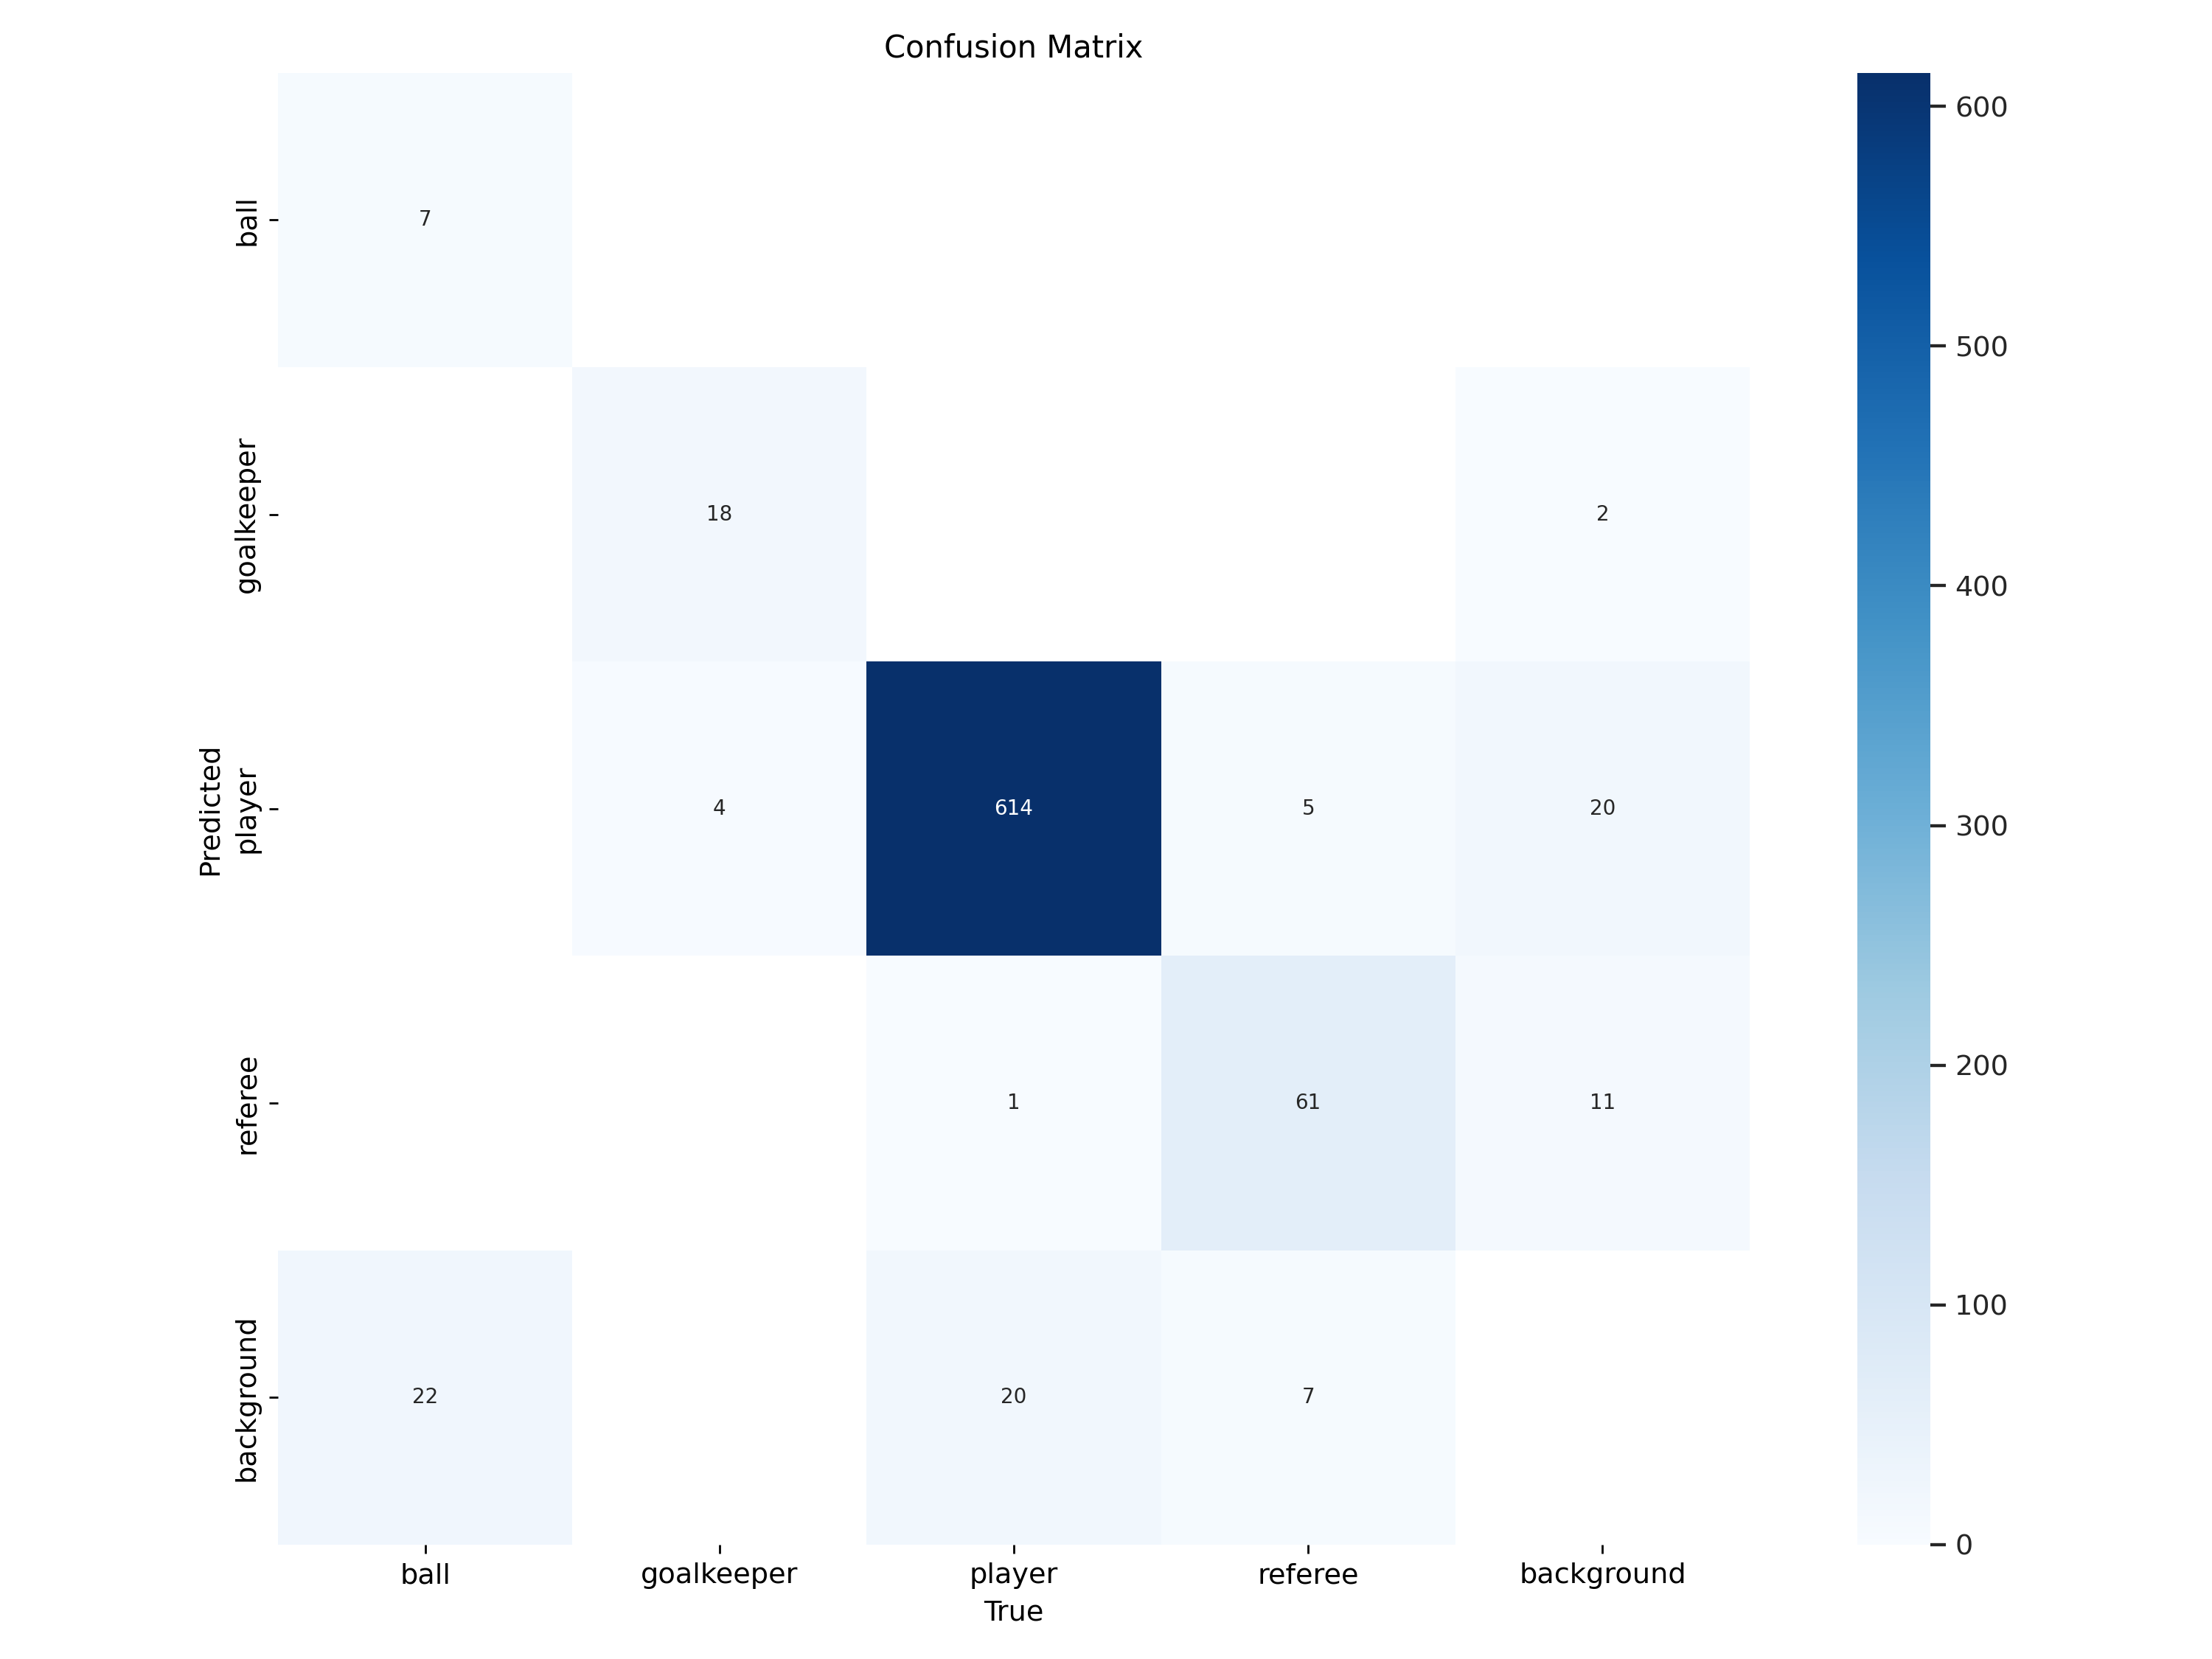

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', height=600)

/content


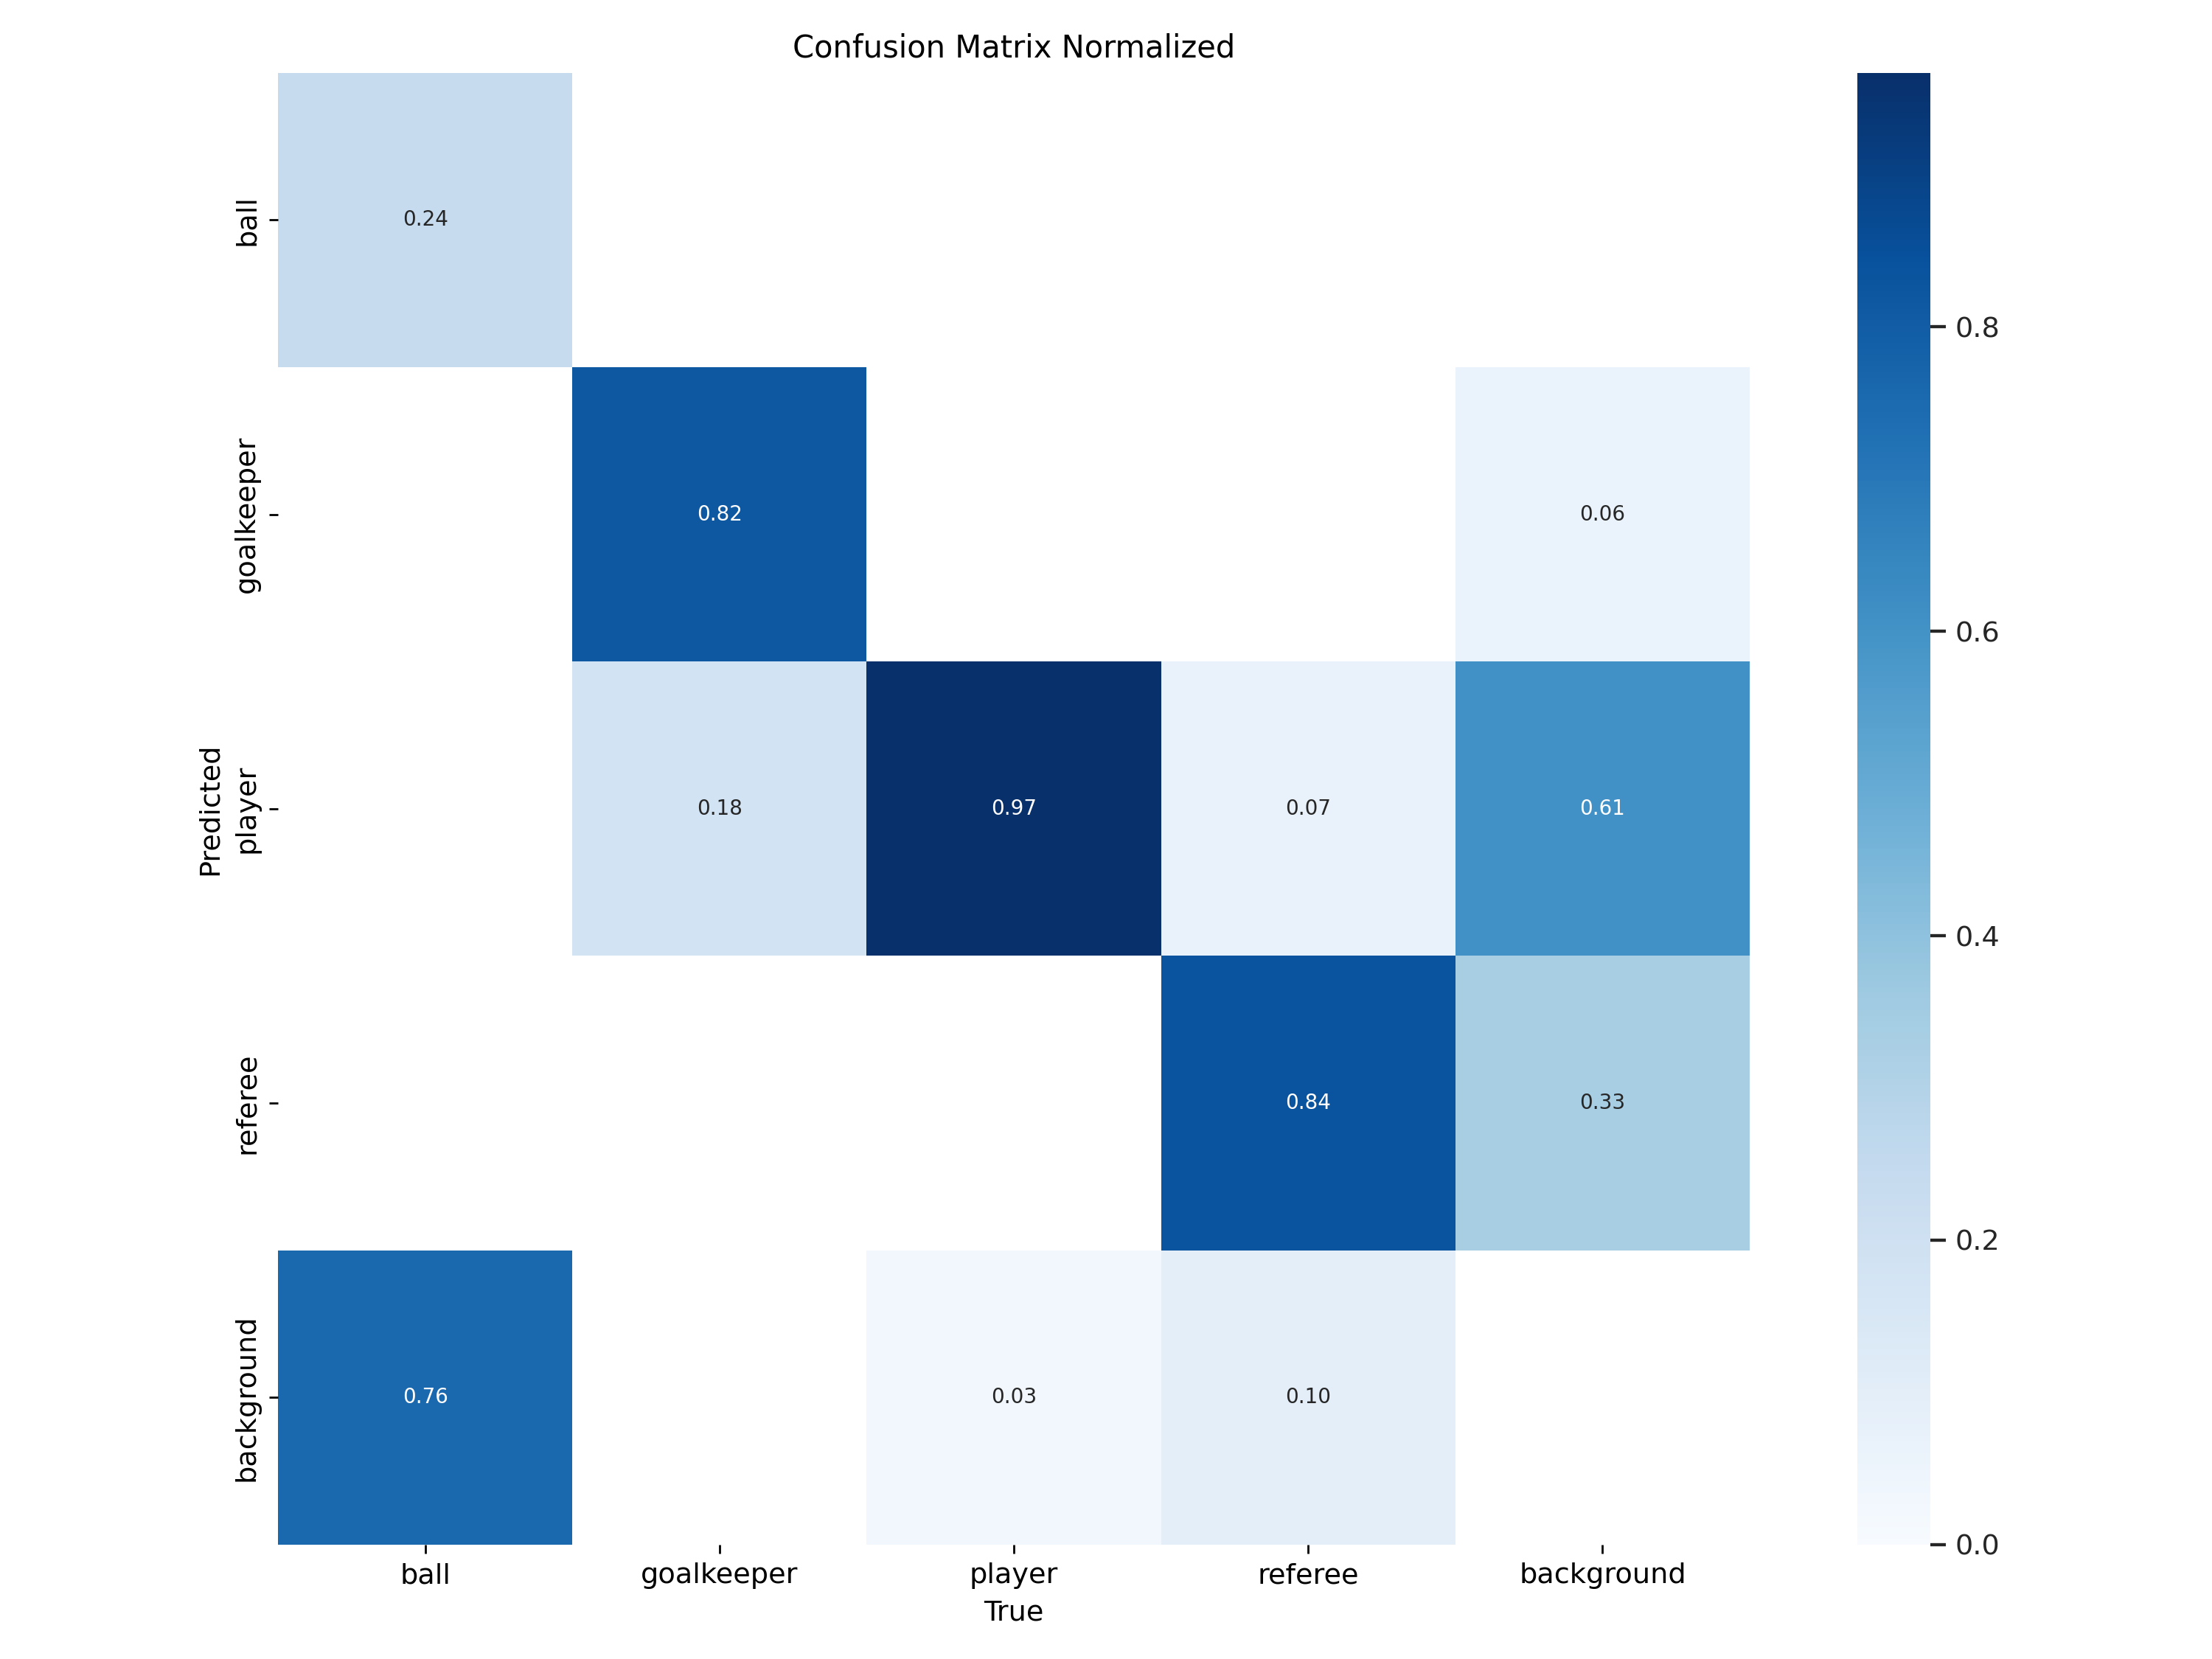

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', height=600)

In [14]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients
val: Scanning /content/Fotball-Players-Detection--1/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100% 32/32 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.11s/it]
                   all         32        759      0.921      0.779      0.822       0.54
                  ball         32         29          1      0.334       0.45       0.17
            goalkeeper         32         22      0.904      0.909      0.924      0.655
                player         32        635      0.933      0.971      0.988      0.752
               referee         32         73      0.846      0.903      0.928      0.583
Speed: 7.4ms preprocess, 15.1ms inference, 0.0ms loss, 13.5ms postprocess per image
Results saved to runs/detect/val


In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/10 /content/Fotball-Players-Detection--1/test/images/40cd38_7_6_png.rf.8ebe88ec942536cc6852621f6cd04701.jpg: 800x800 20 players, 1 referee, 25.3ms
image 2/10 /content/Fotball-Players-Detection--1/test/images/42ba34_5_5_png.rf.a6b2308ecb296a6bd909fc148feb1912.jpg: 800x800 1 goalkeeper, 21 players, 1 referee, 24.7ms
image 3/10 /content/Fotball-Players-Detection--1/test/images/4b770a_3_6_png.rf.efdc18b67e46c5739ccb3483682be158.jpg: 800x800 1 goalkeeper, 24 players, 2 referees, 24.6ms
image 4/10 /content/Fotball-Players-Detection--1/test/images/573e61_1_9_png.rf.28bb7083480d9c1a98adbd345da27a9d.jpg: 800x800 19 players, 3 referees, 24.6ms
image 5/10 /content/Fotball-Players-Detection--1/test/images/573e61_9_6_png.rf.a9bf65601bfff2ddcb55baf6c2544017.jpg: 800x800 1 goalkeeper, 20 players, 4 referees, 24.5ms
image 6/10 /co

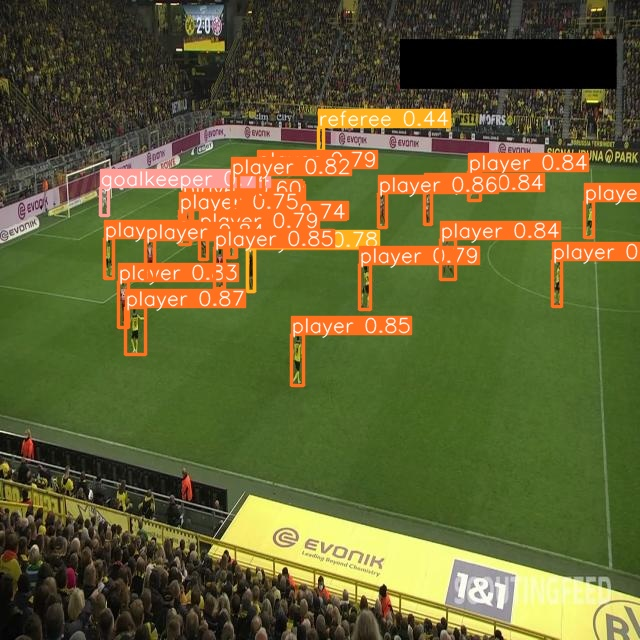

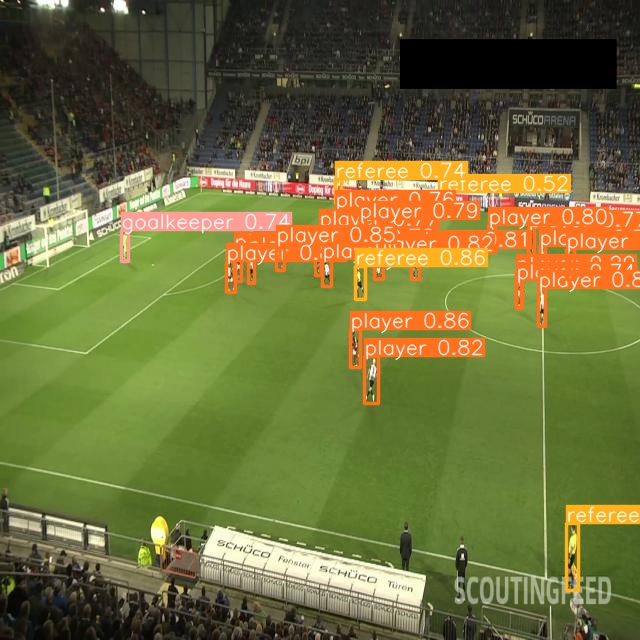

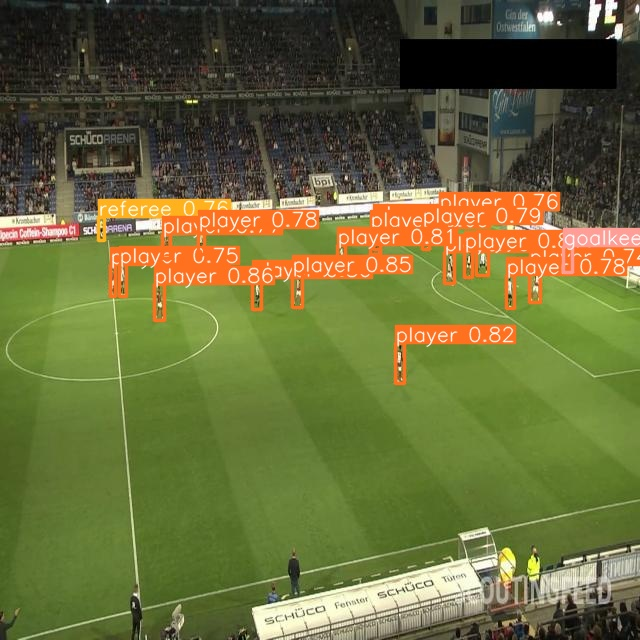

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [17]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/PeladaAmigos.jpeg' 

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/1 /content/PeladaAmigos.jpeg: 608x800 3 players, 59.0ms
Speed: 5.0ms preprocess, 59.0ms inference, 87.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict3


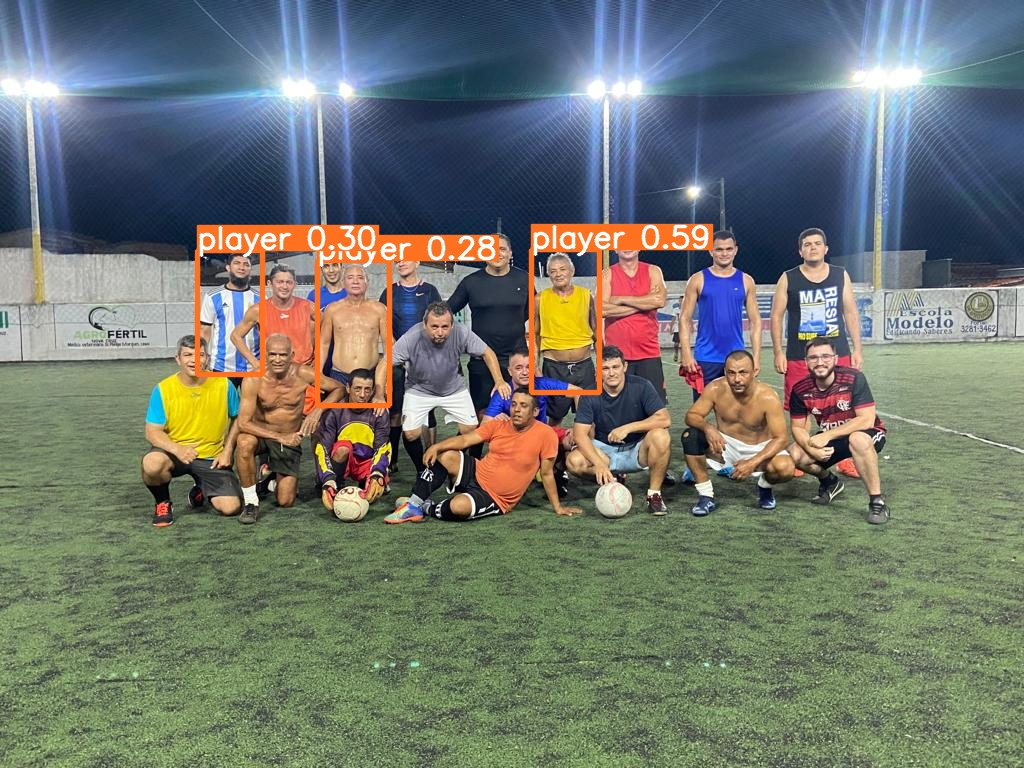

In [18]:
Image(filename='/content/runs/detect/predict3/PeladaAmigos.jpeg', height=600)

In [19]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/futebol.png'

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/1 /content/futebol.png: 384x800 15 players, 2 referees, 66.5ms
Speed: 3.4ms preprocess, 66.5ms inference, 99.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict4


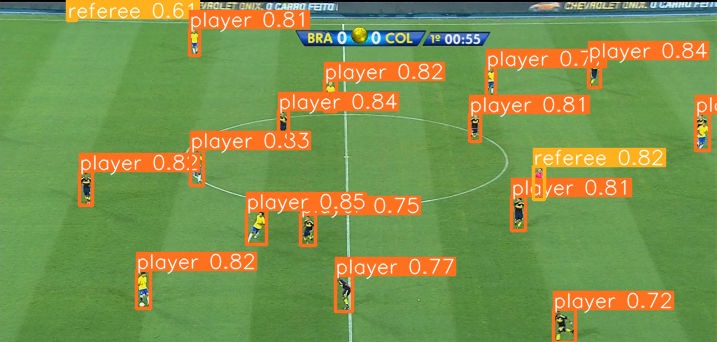

In [20]:
Image(filename='/content/runs/detect/predict4/futebol.png', height=600)

In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/GolNeymar.mp4

/content
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

video 1/1 (1/500) /content/GolNeymar.mp4: 480x800 1 ball, 19 players, 64.2ms
video 1/1 (2/500) /content/GolNeymar.mp4: 480x800 19 players, 15.5ms
video 1/1 (3/500) /content/GolNeymar.mp4: 480x800 1 ball, 19 players, 15.5ms
video 1/1 (4/500) /content/GolNeymar.mp4: 480x800 20 players, 1 referee, 15.5ms
video 1/1 (5/500) /content/GolNeymar.mp4: 480x800 18 players, 15.4ms
video 1/1 (6/500) /content/GolNeymar.mp4: 480x800 18 players, 15.5ms
video 1/1 (7/500) /content/GolNeymar.mp4: 480x800 1 ball, 18 players, 17.0ms
video 1/1 (8/500) /content/GolNeymar.mp4: 480x800 1 ball, 19 players, 15.5ms
video 1/1 (9/500) /content/GolNeymar.mp4: 480x800 1 ball, 18 players, 15.5ms
video 1/1 (10/500) /content/GolNeymar.mp4: 480x800 1 ball, 18 players, 15.5ms
video 1/1 (11/500) /content/GolNeymar.mp4: 480x800 1 ball, 17 players, 15.5ms
video 